In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10, 7)
import seaborn as sns
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False})
from warnings import filterwarnings
filterwarnings('ignore')
import mglearn

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, classification_report

In [2]:
# !pip install mglearn

### 비지도 학습
- 분류나 회귀 같은 기법은 사용할 목표 변수가 존재하지 않는 데이터로부터 숨어 있는 패턴이나 구조를 찾는 것이 목표이다.
- 범용적으로 통용되는 결과 검증 방법이 없기 때문에 비지도 학습 기법의 결과에 관한 평가는 쉽지 않다.

### K-평균 군집화(K-means)
- 관측값을 서로 유사성이 높은 것끼리 묶어 다수의 그룹으로 만드는 것으로 동일 그룹 내 구성원 간의 유사성은 매우 높지만 다른 그룹의 구성원과의 유사성은 거의 없도록 하는 것이 목적이다.
- 데이터 세트 내부의 기본 패턴을 알아내거나 특정 성질을 가진 그룹을 생성할 때 흔히 사용하는 방법이다.
- 작동 원리
    - 반복적인 작업으로 각 클러스터(cluster)의 현재 중심을 구성원의 평균 위치로 옮기고 중심이 옮겨진 위치로부터 가장 가까운 점들로 다시 구성원을 형성한 후 새로운 평균을 구하고 위치를 옮기는 작업을 반복한다.
    - 클러스터의 중심이 더 이상 유의미한 변화가 없거나 미리 설정해둔 반복 횟수에 도달하면 멈춘다.
    - K-평균의 비용 함수는 클러스터의 중심과 클러스터에 속한 관측값 사이의 유클리드 거리로 결정된다.

#### 최적 클러스터 개수 - 엘보 기법(elbow method)
- k 값이 증가하면 평균적인 왜곡이 줄어든다. 이는 각 클러스터의 구성원들이 줄어들수록 모든 구성원이 중심에 더 가까워지기 때문이다.
- k 값의 증가에 따라 왜곡의 개선이 꾸준히 이뤄지다가 어느 시점이 되면 k값이 증가해도 평균적인 왜곡의 개선이 급격히 저하되는 시점이 발생한다.
- k 값 증가에 따른 왜곡 개선의 저하가 최대가 되는 지점을 엘보라 부르고, 더 이상 클러스터를 증가시키지 않아도 될 최적 시점으로 볼 수 있다.

#### 클러스터 평가 - 실루엣 계수(silhouette coefficient)
- 클러스터가 어느정도 밀집해 있는지 알아보는 척도
- 값이 높을수록 클러스터의 품질이 우수하다는 것을 의미한다.
- 클러스터들이 잘 분리돼 있으면 높은 값을 갖고, 서로 겹치면 낮은 값을 갖는데, -1부터 1사이의 어느 한 값을 가지며 값이 클수록 좋다

#### K-means 과정

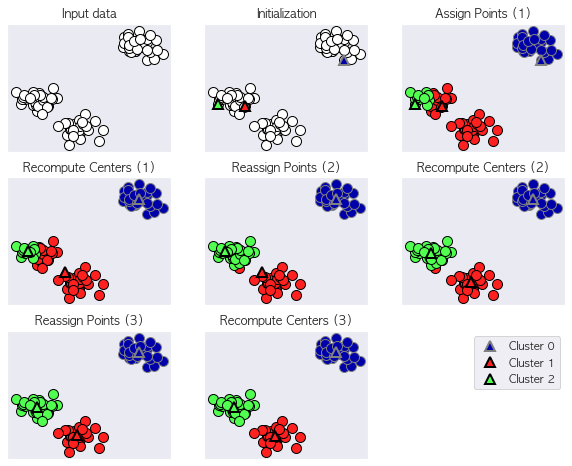

In [3]:
mglearn.plots.plot_kmeans_algorithm()

In [4]:
# 데이터 생성
df = pd.DataFrame([[ 2,  3],
       [ 2, 11],
       [ 2, 18],
       [ 4,  5],
       [ 4,  7],
       [ 5,  3],
       [ 5, 15],
       [ 6,  6],
       [ 6,  8],
       [ 6,  9],
       [ 7,  2],
       [ 7,  4],
       [ 7,  5],
       [ 7, 17],
       [ 7, 18],
       [ 8,  5],
       [ 8,  4],
       [ 9, 10],
       [ 9, 11],
       [ 9, 15],
       [ 9, 19],
       [10,  5],
       [10,  8],
       [10, 18],
       [12,  6],
       [13,  5],
       [14, 11],
       [15,  6],
       [15, 18],
       [18, 12]])
df.columns = ['x', 'y']

In [5]:
df.head()

,x,y
0,2,3
1,2,11
2,2,18
3,4,5
4,4,7


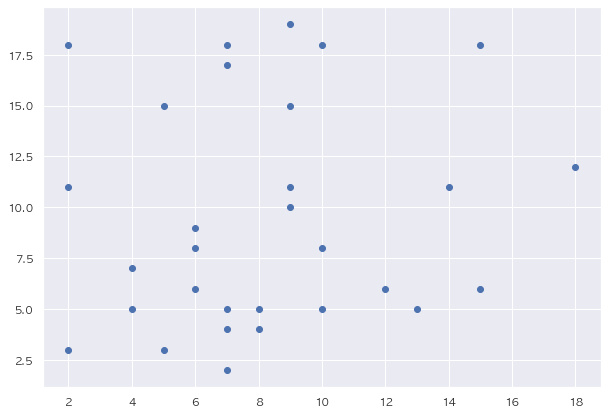

In [6]:
# 데이터 시각화 
plt.scatter(df['x'], df['y'])
plt.show()

In [7]:
# 모델 생성 및 학습
km = KMeans(n_clusters=4)
km.fit(df)

KMeans(n_clusters=4)

In [8]:
# 각 군집의 중심점 좌표
cen = km.cluster_centers_
cen

array([[ 5.53846154,  5.53846154],
       [11.14285714,  7.28571429],
       [ 7.        , 17.14285714],
       [15.66666667, 13.66666667]])

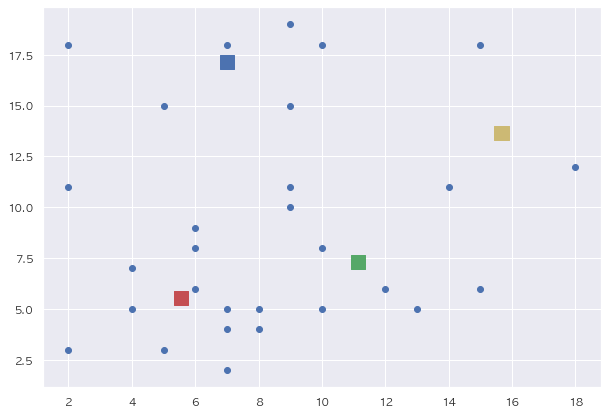

In [9]:
# 데이터와 군집의 중심점 시각화
plt.scatter(df['x'], df['y'])
plt.scatter(cen[:, 0], cen[:, 1], c=['r', 'g', 'b', 'y'], marker='s', s=200)
plt.show()

In [10]:
# 분류한 라벨값 데이터프레임에 추가
df['label'] = km.labels_
df.head()

,x,y,label
0,2,3,0
1,2,11,0
2,2,18,2
3,4,5,0
4,4,7,0


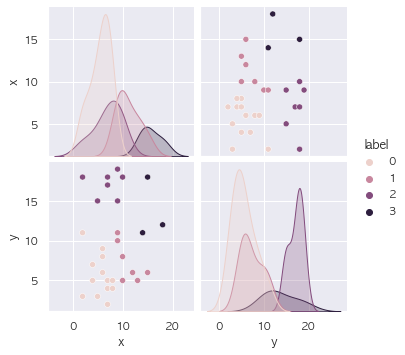

In [11]:
sns.pairplot(df, hue='label')
plt.show()

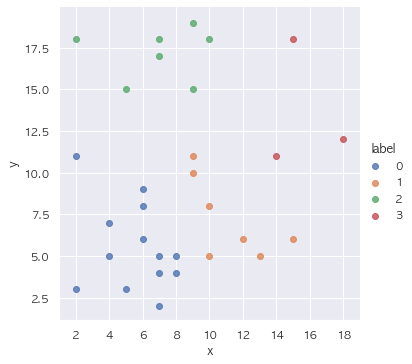

In [12]:
sns.lmplot(x='x', y='y', data=df, fit_reg=False, hue='label')
plt.show()

### iris 데이터 K-means

In [14]:
# 데이터 불러오기
iris = load_iris()

In [16]:
# 데이터 정보
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [32]:
# 데이터 프레임 생성
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['specis'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specis
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [33]:
iris_df['specis'] = iris_df['specis'].apply(lambda x: iris.target_names[x])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specis
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [35]:
# 입출력 데이터 생성
# y_data는 그래프에 색깔을 그릴 때 이용
x_data = iris_df.drop('specis', axis=1)
y_data = iris_df['specis']

In [47]:
# 모델 생성 및 학습 
# 타겟 데이터는 필요하지 않다 -> 여기서는 타겟 데이터가 있지만 실제로는 타겟 데이터가 존재하지 않는다
km2 = KMeans(n_clusters=3, max_iter=300)
km2.fit(x_data)

KMeans(n_clusters=3)

In [48]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [49]:
# 예측 
km2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [50]:
# confusion matrix
pd.crosstab(y_data, km2.labels_, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2
Actual,,,
setosa,50,0,0
versicolor,0,48,2
virginica,0,14,36


setosa는 모두 정확히 분류됐고 versicolor는 2개, virginica는 14개 잘못 분류됐다

In [46]:
silhouette_score(x_data, km2.labels_, metric='euclidean')

0.5528190123564091

여기서는 부류가 3종류인걸 알기에 n_cluster를 3으로 설정했지만 실제로는 부류의 이름이나 개수를 사전에 알 수 있는 방법이 없다

In [54]:
# 민감도 분석
for k in range(2, 10):
    km3 = KMeans(n_clusters=k, max_iter=300).fit(x_data)
    print(f"For k value {k}, silhouette-score:{silhouette_score(x_data, km3.labels_, metric='euclidean'):.4}")

For k value 2, silhouette-score:0.681
For k value 3, silhouette-score:0.5528
For k value 4, silhouette-score:0.4981
For k value 5, silhouette-score:0.4887
For k value 6, silhouette-score:0.3687
For k value 7, silhouette-score:0.3539
For k value 8, silhouette-score:0.3575
For k value 9, silhouette-score:0.3299


실루엣 계수 결과에 따라 k가 2나 3일때 좋은 점수를 보인다. 경험칙에 따라 k값을 가장 높은 실루엣 바로 다음 값인 3으로 정한다

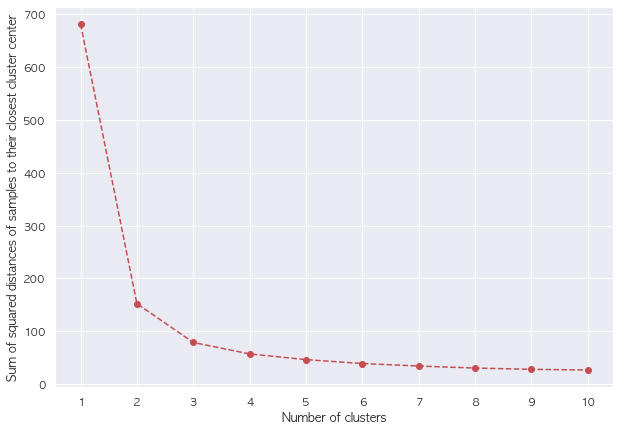

In [66]:
# 엘보 곡선
inertia = []
for k in range(1, 11):
    km4 = KMeans(n_clusters=k, max_iter=300).fit(x_data)
    # 센터에서 거리 제곱의 총합
    inertia.append(km4.inertia_)
    
plt.plot(range(1, 11), data, 'ro--')
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances of samples to their closest cluster center')
plt.show()

cluster수가 3일 때 기울기가 급격히 변하는 것을 볼 수 있다. 여기서도 최적 k값은 3으로 추정할 수 있다. 